In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Combine energy data and climate data

- wind_speed = m/s
- solar_radiation = W/m2

In [2]:
df_energy_climate_2020 = pd.read_csv('../../data/prepared/df_energy_climate_2020.csv')
df_energy_climate_2020.head()

,datetime,wind_speed,solar_radiation,nuclear_power,not_renewable,renewable,energy_price
0,2020-01-01 00:00:00,2.4,0,8088.21750,29512.74850,14541.30200,38.60
1,2020-01-01 01:00:00,2.4,0,8081.15875,29178.66275,14949.45575,36.55
2,2020-01-01 02:00:00,2.5,0,8071.44750,29414.36225,15077.92500,32.32
3,2020-01-01 03:00:00,2.4,0,8072.27750,29365.12575,15307.22725,30.85
4,2020-01-01 04:00:00,2.4,0,8068.91550,29436.37500,15320.25825,30.14


## Correlation of energy and climate
- wind speed and renewable energy have high correlation
- wind speed and energy price have negative correlation

In [3]:
df_energy_climate_2020.corr(numeric_only=True)

,wind_speed,solar_radiation,nuclear_power,not_renewable,renewable,energy_price
wind_speed,1.000000,0.096488,-0.050952,-0.379269,0.804260,-0.444114
solar_radiation,0.096488,1.000000,-0.254697,-0.186633,0.478710,-0.216114
nuclear_power,-0.050952,-0.254697,1.000000,0.407899,-0.135583,0.373059
not_renewable,-0.379269,-0.186633,0.407899,1.000000,-0.460238,0.797350
renewable,0.804260,0.478710,-0.135583,-0.460238,1.000000,-0.513584
energy_price,-0.444114,-0.216114,0.373059,0.797350,-0.513584,1.000000


In [4]:
# imports
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
%matplotlib inline

In [5]:
# resample the combined df by month
df_energy_climate_2020['datetime'] = pd.to_datetime(df_energy_climate_2020['datetime'])
df_energy_climate_2020.set_index('datetime', inplace=True)
df_energy_climate_per_month_2020 = df_energy_climate_2020.resample('M').mean()
df_energy_climate_per_month_2020.reset_index(inplace=True)

In [6]:
df_energy_climate_per_month_2020['month_year'] = df_energy_climate_per_month_2020['datetime'].dt.to_period('M')
df_energy_climate_per_month_2020

,datetime,wind_speed,solar_radiation,nuclear_power,not_renewable,renewable,energy_price,month_year
0,2020-01-31,4.155108,34.024194,7807.641693,40108.081534,30550.649508,34.978710,2020-01
1,2020-02-29,5.970690,56.419540,7419.751695,29840.861220,39375.945443,21.911839,2020-02
2,2020-03-31,4.426747,131.969086,7266.131540,31178.614326,32605.582938,22.519315,2020-03
3,2020-04-30,3.495417,229.087500,6561.627329,24050.886692,29070.825843,17.049194,2020-04
4,2020-05-31,3.361694,234.065860,5762.919882,24769.446723,27092.300725,17.604879,2020-05
5,2020-06-30,3.197083,230.220833,6463.409776,29899.843443,24925.065740,26.229167,2020-06
6,2020-07-31,3.185484,235.129032,5687.576221,30833.884795,26203.010712,30.074946,2020-07
7,2020-08-31,2.995833,200.256720,7521.303469,34069.302622,24342.192233,34.889704,2020-08
8,2020-09-30,2.827222,153.597222,7349.898565,37079.136104,23241.985196,43.678097,2020-09
9,2020-10-31,3.853629,67.380376,6892.146856,36540.185486,29493.414200,33.955901,2020-10


In [7]:
month_list = df_energy_climate_per_month_2020['month_year'].dt.strftime("%Y-%m").to_list()

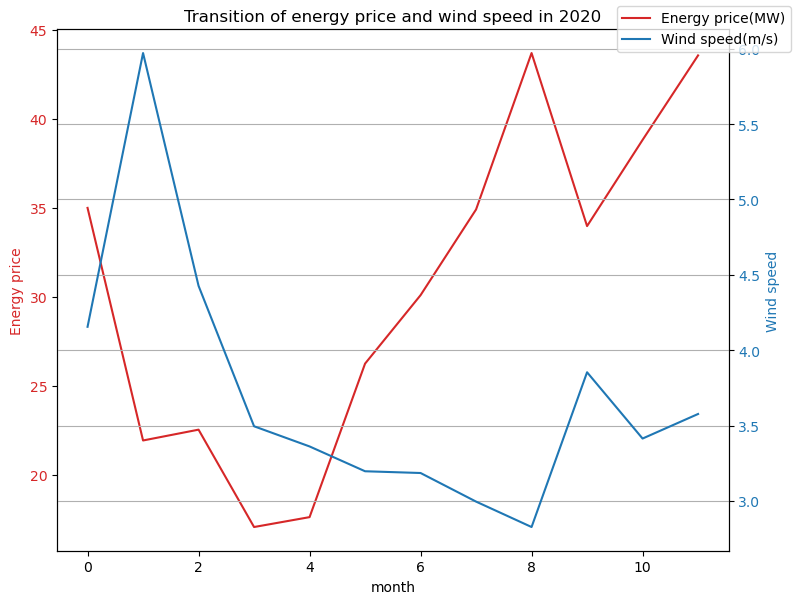

In [8]:
# plot energy price and wind speed in one graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# energy_price
color_1 = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('Energy price', color=color_1)
ax1.plot(
    # methode nachschauen - matplotlib / pandas
    df_energy_climate_per_month_2020['energy_price'],
    color=color_1
)

# #? xticklabels wrong
# ax1.set_xticklabels(
#     df_energy_climate_per_month_2020['month_year'], 
#     rotation=45
# )

# wind_speed
ax2 = ax1.twinx()
color_2 = 'tab:blue'
ax2.set_ylabel('Wind speed', color=color_2)
ax2.plot(
    df_energy_climate_per_month_2020['wind_speed'],
    color=color_2
)

# change label color
ax1.tick_params(axis='y', labelcolor=color_1)
ax2.tick_params(axis='y', labelcolor=color_2)

# rotate x-axis
ax2.tick_params(axis='x', rotation=45)

# adjust subplot params so that the subplots fits in to the figure area
fig.tight_layout()

plt.grid()
plt.title('Transition of energy price and wind speed in 2020')
fig.legend(['Energy price(MW)', 'Wind speed(m/s)'])
plt.show()

- Price reduction from April to May although wind speed is not high (incident in the period: first corona-lockdown in Germany in March)